## Customer Life Time Value Research 

### 1987 COUNTING YOUR CUSTOMERS: WHO ARE THEY AND WHAT WILL THEY DO NEXT?

#### Practice



In [108]:
import pandas as pd
import numpy as np
import os

%matplotlib inline

try:
    

    df = pd.read_excel('/Users/rajeshpillai/Downloads/Online_Retail.xlsx',skiprows=0,header=0)

    df = df.dropna()

except:
    print('File Not Found')
    
# Add Total by multiplying Quantity and Unit Price

df['Total'] = df.Quantity*df.UnitPrice

# Change date format to YYYYMM

df['DateYMD'] = df.InvoiceDate.dt.strftime('%Y%m%d')

df['CustomerID'] =df['CustomerID'].astype('int')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,DateYMD
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,20101201
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20101201
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,20101201
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20101201
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20101201


In [173]:
#df[df.CustomerID==12346]

df[df.CustomerID==12748].Total.sum()

29072.1

 Our goal is to calculate the conditional probability
####  P(Alive / lnformation)


#### Information = (X, t, T).

We will assume only one purchase a day by each customer. 
We reduce the available information into CustomerID, Date of puchase

In [128]:
df_rfm = df[['CustomerID','InvoiceDate','Total','Country']]

# Remove duplicates

df_rfm = df_rfm\
                .drop_duplicates() \
                .reset_index() 
                
df_rfm = df_rfm[df_rfm.Country=='United Kingdom']

df_rfm = df_rfm[['CustomerID','InvoiceDate','Total']]

df_rfm['InvoiceDate'] = pd.DatetimeIndex(df_rfm['InvoiceDate']).normalize()

    
df_rfm.head()

,CustomerID,InvoiceDate,Total
0,17850,2010-12-01,15.30
1,17850,2010-12-01,20.34
2,17850,2010-12-01,22.00
3,17850,2010-12-01,15.30
4,17850,2010-12-01,25.50


In [143]:
import lifetimes as lt

rfm = lt.utils.summary_data_from_transaction_data(df_rfm, customer_id_col='CustomerID', 
                                            datetime_col='InvoiceDate',datetime_format='yyyy-mm-dd',
                                            monetary_value_col='Total')

In [153]:
# Remove single purchase customers

rfm = rfm[rfm.frequency>0]

# Remove non zero monetary values

rfm = rfm[rfm.monetary_value >0]

In [154]:
rfm.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12747,10.0,367.0,369.0,346.17300
12748,114.0,373.0,373.0,185.40886
12749,6.0,210.0,213.0,301.04000
12820,3.0,323.0,326.0,158.60000
12822,2.0,17.0,87.0,76.21500


In [161]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(rfm['frequency'],
        rfm['monetary_value'])
print(ggf)



<lifetimes.GammaGammaFitter: fitted with 2526 subjects, p: 1.52, q: 4.23, v: 488.25>


In [162]:
print(ggf.conditional_expected_average_profit(
        rfm['frequency'],
        rfm['monetary_value']
    ).head(10))

CustomerID
12747    325.681366
12748    186.215161
12749    282.282155
12820    187.984320
12822    155.190286
12823    316.846738
12826    116.885343
12827    162.522490
12828    161.230823
12829    158.792198
dtype: float64


In [169]:
from lifetimes import ParetoNBDFitter

pnf = ParetoNBDFitter()

pnf.fit(rfm['frequency'],
        rfm['recency'],
        rfm['T']
       )

print(pnf)

<lifetimes.ParetoNBDFitter: fitted with 2526 subjects, alpha: 89.49, beta: 993.34, r: 1.79, s: 0.04>


In [176]:
ggf.customer_lifetime_value(pnf,rfm['frequency'],
        rfm['recency'],
        rfm['T'],
        rfm['monetary_value']).head()

CustomerID
12747     2814.846072
12748    15667.193825
12749     2442.201177
12820      728.557991
12822     1111.072964
Name: clv, dtype: float64

In [178]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter()

bgf.fit(rfm['frequency'],
        rfm['recency'],
        rfm['T']
       )

print(bgf)

<lifetimes.BetaGeoFitter: fitted with 2526 subjects, a: 0.04, alpha: 88.75, b: 1.19, r: 1.85>


In [179]:
ggf.customer_lifetime_value(bgf,rfm['frequency'],
        rfm['recency'],
        rfm['T'],
        rfm['monetary_value']).head()

CustomerID
12747     2801.857972
12748    15594.343526
12749     2420.626598
12820      722.710656
12822      997.887461
Name: clv, dtype: float64

In [ ]:
lt.GammaGammaFitter()

In [127]:
#df_rfm['InvoiceDate'].DatetimeIndex

pd.DatetimeIndex(df_rfm['InvoiceDate']).normalize()

DatetimeIndex(['2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01',
               ...
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09'],
              dtype='datetime64[ns]', name='InvoiceDate', length=220912, freq=None)

In [110]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19708 entries, 0 to 22032
Data columns (total 2 columns):
CustomerID     19708 non-null int64
InvoiceDate    19708 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 461.9 KB


For any time T > 0, if the customeri s still alive at T (so r > T) the number of purchases in
(0, T] has the Poisson distribution:
P [X =xlX,,r> T] =e-XT( (XTT)X) ; x =0, 12, ..., (1)

3950


,index,CustomerID,InvoiceDate
0,0,17850,2010-12-01 08:26:00
1,1,17850,2010-12-01 08:28:00
2,2,13047,2010-12-01 08:34:00
3,3,13047,2010-12-01 08:35:00
4,5,13748,2010-12-01 09:00:00


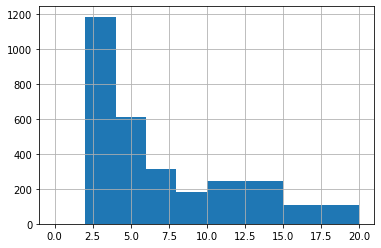

In [111]:
# total number of customers

print(len(df_rfm.CustomerID.unique()))


# Remove single occurance

k = df_rfm.groupby(by='CustomerID')\
                                   .InvoiceDate\
                                   .count()\
                                   .to_frame()\
                                   .reset_index()
k = k[k.InvoiceDate==1]

k.head()

exclude = k.CustomerID

df_rfm = df_rfm[~df_rfm.CustomerID.isin(exclude)]\
                                                .reset_index()

# customers by number of transactions

bins =[0,2,4,6,8,10,15,20]

df_rfm.groupby(by='CustomerID')\
                               .InvoiceDate.count()\
                               .sort_values()\
                               .hist(bins=bins)



df_rfm.head()

In [112]:
# Information = (X, t, T)
# X - number of transactions upto time T
# t - time of last purchase
# T - a time post last purchase, with the last purchase coming at time t <= T *
# * - need further study to verify

## Derive X
df_information = df_rfm.groupby(by='CustomerID')\
                                   .InvoiceDate\
                                   .count()\
                                   .reset_index()\
                                   .rename(columns={"InvoiceDate":"X"})

## Derive t

df_information_last = df_rfm.groupby(by='CustomerID')\
                                                  .InvoiceDate\
                                                  .max()\
                                                  .reset_index()\
                                                  .rename(columns={"InvoiceDate":"last_trans"})
## Derive first transaction date

df_information_first = df_rfm.groupby(by='CustomerID')\
                                                  .InvoiceDate\
                                                  .min()\
                                                  .reset_index()\
                                                  .rename(columns={"InvoiceDate":"first_trans"})
    
# Merge both dataframes

df_information = df_information.merge(df_information_last,how='inner',on='CustomerID')

df_information = df_information.merge(df_information_first,how='inner',on='CustomerID')



,CustomerID,X,last_trans,first_trans
0,12346,2,2011-01-18 10:17:00,2011-01-18 10:01:00
1,12747,11,2011-12-07 14:34:00,2010-12-05 15:38:00
2,12748,225,2011-12-09 12:20:00,2010-12-01 12:48:00
3,12749,8,2011-12-06 09:56:00,2011-05-10 15:25:00
4,12820,4,2011-12-06 15:12:00,2011-01-17 12:34:00


In [113]:
# No of days between first and last transaction

df_information['t'] = (df_information['last_trans'] - df_information['first_trans']).astype()

df_information.head()



,CustomerID,X,last_trans,first_trans,t
0,12346,2,2011-01-18 10:17:00,2011-01-18 10:01:00,0 days 00:16:00
1,12747,11,2011-12-07 14:34:00,2010-12-05 15:38:00,366 days 22:56:00
2,12748,225,2011-12-09 12:20:00,2010-12-01 12:48:00,372 days 23:32:00
3,12749,8,2011-12-06 09:56:00,2011-05-10 15:25:00,209 days 18:31:00
4,12820,4,2011-12-06 15:12:00,2011-01-17 12:34:00,323 days 02:38:00


In [117]:
(df_information['last_trans'] - df_information['first_trans']).dt.strftime('D')

AttributeError: 'TimedeltaProperties' object has no attribute 'strftime'

In [119]:
from lifetimes.datasets import load_cdnow_summary
data = load_cdnow_summary(index_col=[0])



In [123]:
data['T'].unique()

array([38.86, 38.71, 38.57, 38.43, 38.29, 38.14, 38.  , 37.86, 37.71,
       37.57, 37.43, 37.29, 37.14, 37.  , 36.86, 36.71, 36.57, 36.43,
       36.29, 36.14, 36.  , 35.86, 35.71, 35.57, 35.43, 35.29, 35.14,
       35.  , 34.86, 34.71, 34.57, 34.43, 34.29, 34.14, 34.  , 33.86,
       33.71, 33.57, 33.43, 33.29, 33.14, 33.  , 32.86, 32.71, 32.57,
       32.43, 32.29, 32.14, 32.  , 31.86, 31.71, 31.57, 31.43, 31.29,
       31.14, 31.  , 30.86, 30.71, 30.57, 30.43, 30.29, 30.14, 30.  ,
       29.86, 29.71, 29.57, 29.43, 29.29, 29.14, 29.  , 28.86, 28.71,
       28.57, 28.43, 28.29, 28.14, 28.  , 27.86, 27.71, 27.57, 27.43,
       27.29, 27.14, 27.  ])